# Linear models

### Outline <a name = 'outline'></a>
* [Data generation](#data) 
* [Model training](#models) 
* [Text Data Classification](#text)

In [1]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.pyplot.style.use('ggplot')

from sklearn import datasets, linear_model, metrics, model_selection, pipeline, preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import numpy as np

In [2]:
%matplotlib inline

[** Linear models:**](#linear) 
* RidgeClassifier
* SGDClassifier
* SGDRegressor
* LinearRegression
* LogisticRegression
* Lasso
* etc

documentation: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

examples: http://scikit-learn.org/stable/modules/linear_model.html#linear-model

### Data Generation <a name = 'data'></a>

In [5]:
data, target, coef = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                              noise = 5., coef = True, random_state = 2)

In [6]:
coef

array([38.07925837,  0.        ])

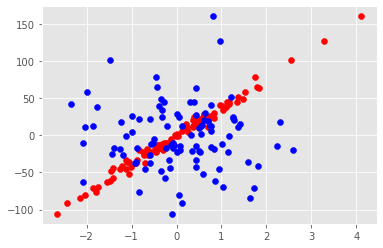

In [7]:
plt.scatter(data[:,0], target, color = 'r')
plt.scatter(data[:,1], target, color = 'b')

[back to outline](#outline)

### Model training <a name = 'models'></a>

In [8]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(
    data, target, test_size = 0.3, random_state = 1)

**Linear regression**

In [9]:
#classifier instance
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)

In [10]:
metrics.mean_absolute_error(test_labels, predictions)

3.8494820446254723

In [11]:
linear_scoring = model_selection.cross_val_score(linear_regressor, 
                                                  data, 
                                                  target, 
                                                  scoring = 'neg_mean_absolute_error', 
                                                  cv = 10)

print(f'Linear model MAE, mean: {-1*linear_scoring.mean():.3f}, std: {linear_scoring.std():.3f}')

Linear model MAE, mean: 4.070, std: 1.074


In [12]:
scorer = metrics.make_scorer(metrics.mean_absolute_error)

linear_scoring = model_selection.cross_val_score(linear_regressor, 
                                                data, 
                                                target, 
                                                scoring = scorer, 
                                                cv = 10)

print(f'Linear model MAE, mean: {linear_scoring.mean():.3f}, std: {linear_scoring.std():.3f}')

Linear model MAE, mean: 4.070, std: 1.074


In [13]:
linear_regressor.coef_

array([38.31554726,  0.32893633])

In [14]:
k = linear_regressor.coef_[0]
b = linear_regressor.coef_[1]

if b >= 0:
    print(f'y = {k:.2f}x + {b:.2f}')
else:
    print(f'y = {k:.2f}x {b:.2f}')

y = 38.32x + 0.33


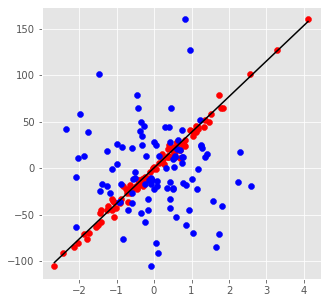

In [15]:
plt.figure(figsize = (5, 5))

plt.scatter(data[:,0], target, color = 'r')
plt.scatter(data[:,1], target, color = 'b')

x = np.linspace(np.min(data[:,0]), np.max(data[:,0]), 20)
y = k*x + b
plt.plot(x, y, 'black')

**Lasso regression**

In [16]:
lasso_regressor = linear_model.Lasso(random_state = 3)
lasso_regressor.fit(train_data, train_labels)
lasso_predictions = lasso_regressor.predict(test_data)

In [17]:
lasso_scoring = model_selection.cross_val_score(lasso_regressor, 
                                                data, 
                                                target, 
                                                scoring = 'neg_mean_absolute_error', 
                                                cv = 10)

print(f'Lasso model MAE, mean: {-1*lasso_scoring.mean():.3f}, std: {lasso_scoring.std():.3f}')

Lasso model MAE, mean: 4.154, std: 1.017


In [18]:
lasso_regressor.coef_

array([37.31770306,  0.        ])

In [19]:
k = lasso_regressor.coef_[0]
b = lasso_regressor.coef_[1]

if b >= 0:
    print(f'y = {k:.2f}x + {b:.2f}')
else:
    print(f'y = {k:.2f}x {b:.2f}')

y = 37.32x + 0.00


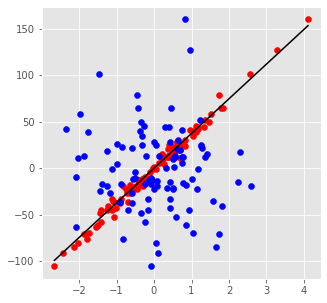

In [20]:
plt.figure(figsize = (5, 5))

plt.scatter(data[:,0], target, color = 'r')
plt.scatter(data[:,1], target, color = 'b')

x = np.linspace(np.min(data[:,0]), np.max(data[:,0]), 20)
y = k*x + b
plt.plot(x, y, 'black')

[back to outline](#outline)

### Text classification <a name = 'text'></a>

**Data loading**

In [21]:
train_data = datasets.fetch_20newsgroups(subset = 'train')
test_data = datasets.fetch_20newsgroups(subset = 'test')

In [22]:
test_data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [23]:
print(train_data.data[10])

From: irwin@cmptrc.lonestar.org (Irwin Arnstein)
Subject: Re: Recommendation on Duc
Summary: What's it worth?
Distribution: usa
Expires: Sat, 1 May 1993 05:00:00 GMT
Organization: CompuTrac Inc., Richardson TX
Keywords: Ducati, GTS, How much? 
Lines: 13

I have a line on a Ducati 900GTS 1978 model with 17k on the clock.  Runs
very well, paint is the bronze/brown/orange faded out, leaks a bit of oil
and pops out of 1st with hard accel.  The shop will fix trans and oil 
leak.  They sold the bike to the 1 and only owner.  They want $3495, and
I am thinking more like $3K.  Any opinions out there?  Please email me.
Thanks.  It would be a nice stable mate to the Beemer.  Then I'll get
a jap bike and call myself Axis Motors!

-- 
-----------------------------------------------------------------------
"Tuba" (Irwin)      "I honk therefore I am"     CompuTrac-Richardson,Tx
irwin@cmptrc.lonestar.org    DoD #0826          (R75/6)
-------------------------------------------------------------------

In [24]:
print(train_data.target_names[train_data.target[10]])

rec.motorcycles


**Data Processing**

In [25]:
#option 1: count vectorizer
vectorizer = CountVectorizer(min_df = 100, stop_words={'english'})

vectorized_train_data = vectorizer.fit_transform(train_data.data)
vectorized_test_data = vectorizer.transform(test_data.data)

In [26]:
len(vectorizer.vocabulary_)

2429

**Modeling**

In [27]:
#count vectorizer is used
model = linear_model.LogisticRegression()
model.fit(vectorized_train_data, train_data.target)

C:\Users\do6pb\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
train_preds = model.predict(vectorized_train_data)
test_preds = model.predict(vectorized_test_data)

In [29]:
print(f'train accuracy: {metrics.accuracy_score(train_data.target, train_preds):.3f}')
print(f'test accuracy: {metrics.accuracy_score(test_data.target, test_preds):.3f}')

train accuracy: 0.992
test accuracy: 0.700


In [30]:
test_obj = 'I understand the advantages of the Windows operating system \
despite the fact that I use a Mac system'
vectorized_test_obj = vectorizer.transform([test_obj])

In [31]:
print(vectorized_test_obj)

  (0, 669)	1
  (0, 844)	1
  (0, 1314)	1
  (0, 1522)	1
  (0, 1546)	1
  (0, 2117)	2
  (0, 2159)	1
  (0, 2160)	3
  (0, 2257)	1
  (0, 2280)	1
  (0, 2381)	1


In [32]:
print(model.predict(vectorized_test_obj)[0])

4


In [33]:
print(test_data.target_names[model.predict(vectorized_test_obj)[0]])

comp.sys.mac.hardware


**Sklearn Pipelines**

Also consider using [make_pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html#sklearn.pipeline.make_pipeline) function

In [34]:
#create 2-step pipeline: vectorizer and reclassifier
pipe = pipeline.Pipeline(steps = [('vectorizer', vectorizer), ('classifier', model)])

In [35]:
pipe.fit(train_data.data, train_data.target)
metrics.accuracy_score(test_data.target, pipe.predict(test_data.data))

C:\Users\do6pb\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.699814126394052

In [36]:
tfidf_pipe = pipeline.Pipeline(steps = [('vectorizer', TfidfVectorizer(min_df = 10, 
                                                                       max_df = 1000, 
                                                                       stop_words={'english'})), 
                                        ('classifier', model)])

In [37]:
tfidf_pipe.fit(train_data.data, train_data.target)
metrics.accuracy_score(test_data.target, tfidf_pipe.predict(test_data.data))

0.8220924057355284